In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import time
tag= 'tmp' + str(int(time.time()))

## Les états du réseau

Brunel décrit quatre états du RRNN :

- Synchronous Regular : Les activations neuronales sont synchrones et les intervalles inter-décharges pour chaque neurone sont identiques
- Synchronous Irregular : Les activations neuronales sont synchrones et les intervalles inter-décharges sont différents
- Asynchronous Regular : Les neurones ne s'activent pas en même temps et les intervalles inter-décharges sont identiques
- Asynchronous Irregular : Les neurones ne s'activent pas en même temps et les intervalles inter-décharges sont différents

Il fait également référence à un paramètre de coupling $g$, qui régulerait le poids de l'inhibition par rapport à celui de l'excitation. La modification d'un tel paramètre permettrait une transition entre les différents états du réseau <cite data-cite="Brunel2000">(Brunel, 2000)</cite>.

Nous faisons alors des suppositions sur la définition de $g$, et nous observons l'effet de $g$ sur le comportement du RRNN, pour chacune de ces suppositions.

### Définir le coupling

La réelle définition du paramètre de coupling n'est pas évidente à appréhender. La seule certitude que nous avons est que le paramètre de coupling doit être un ratio de certains poids par rapport au poids global $W$. C'est pourquoi différents ratio de poids synaptiques pouvant correspondre à $g$ sont ici testés, à savoir :

- $g = W_{IE}, W_{II} / W$
- $g = W_{IE}, W_{EI} / W$
- $g = W_{EI}, W_{II} / W$

Chacune des trois définitions possibles de $g$ correspond à des variations de poids de certaines projections par rapport à d'autres. Aussi, il a précédemment été fait mention d'une méthode permettant d'obtenir une courbe de taux de décharge en fonction de la variation de paramètre.
Une méthode similaire est ici utilisée, mais cette fois, les taux de décharge sont calculés à partir d'une covariation de deux paramètres de poids synaptique et ce, pour chacune des définitions de $g$.

Il semble que si $g$ est défini par le ratio du poids des connexions latérales par rapport à $W$,
l'activité du réseau diminue quand $g$ croît. Ce qui n'est pas sans rappeler les observations effectuées du taux de décharge lors de la manipulation des poids des différentes projections internes au réseau.

### Rôle du coupling

Ainsi, faire varier $g$ devrait provoquer une transition de phase des états d'activité du réseau. Pour observer un tel comportement, la mesure du taux de décharge neuronal, bien qu'elle aie l'avantage d'amener à des observations quantitatives, n'est pas suffisamment informative. C'est pourquoi une méthode qualitative, mais néammoins plus pertinente dans ce contexte, comme la génération de rasterplot, est utilisée.

Une simulation du RRNN est exécutée pour chaque valeur prise par $g$. Les spikes des neurones des populations source, excitatrice et inhibitrice sont récupérés et affichés dans le rasterplot. Ainsi, il est possible de savoir quels neurones ont déchargés et quand.  

Un changement brusque du comportement du réseau est observé lorsque $g$ dépasse une certaine valeur. Par la suite, l'évolution de l'état du réseau se fait de manière continue.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as ps
from RRNN import RRNN

n_sim_each, time = 15, 1000
n_sim_each, time = 5, 100
net = RRNN(time=time)

net.setParams(['w_exc_inh', 'w_exc_exc', 'w_inh_exc', 'w_inh_inh'],
              [net.w, net.w, net.w, net.w])

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH


### Results :

#### G = Wie, Wii / W  

------------ G -------------


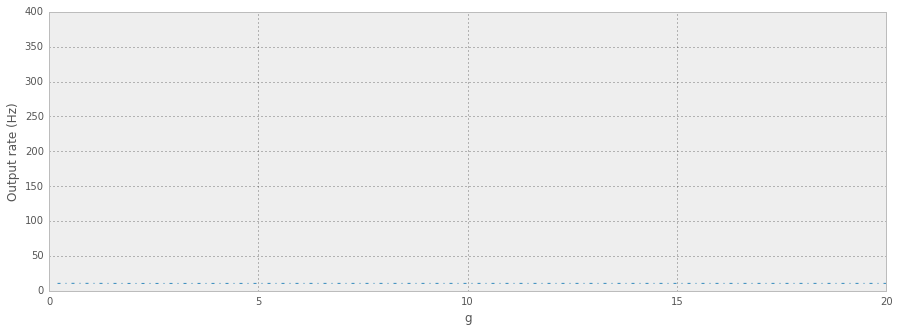

------------ G -------------


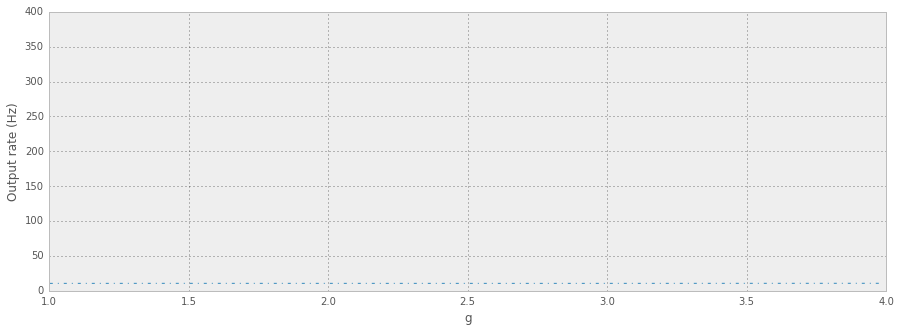

In [3]:
net = RRNN(time=time)
for zoom in [1., .3]:
    net.covariation_Curve('w_inh_exc', 'w_inh_inh',
                      net.w * net.g * np.logspace(-zoom, zoom, n_sim_each),
                      datapath='/tmp/OB-V1_data/RRNN-G0' + tag + str(zoom * 10))

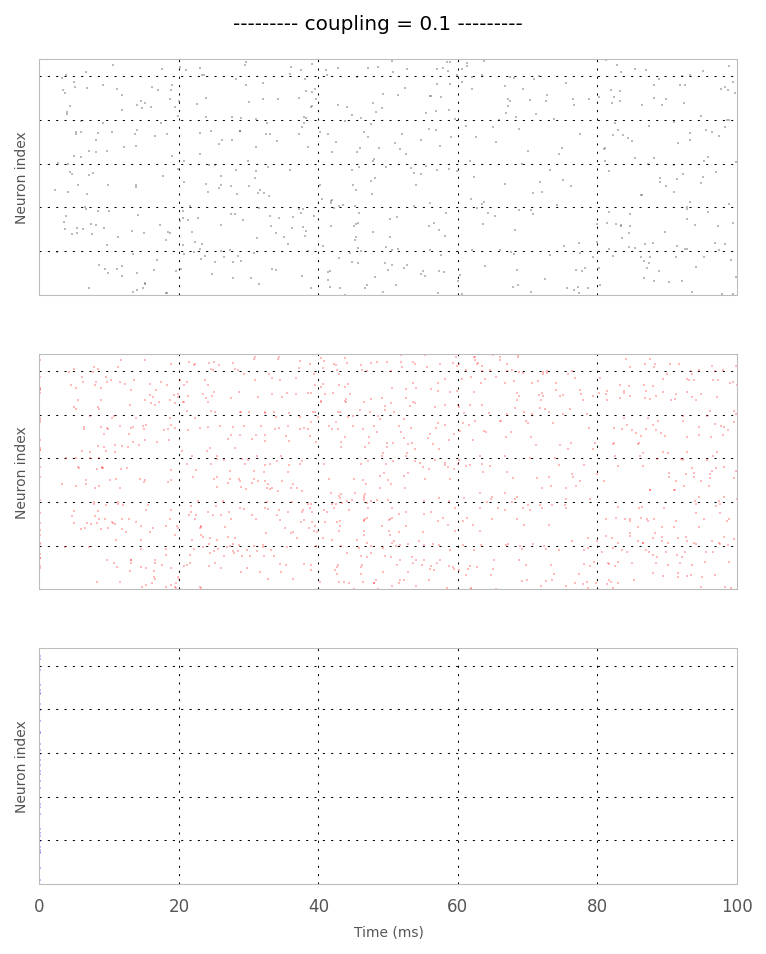

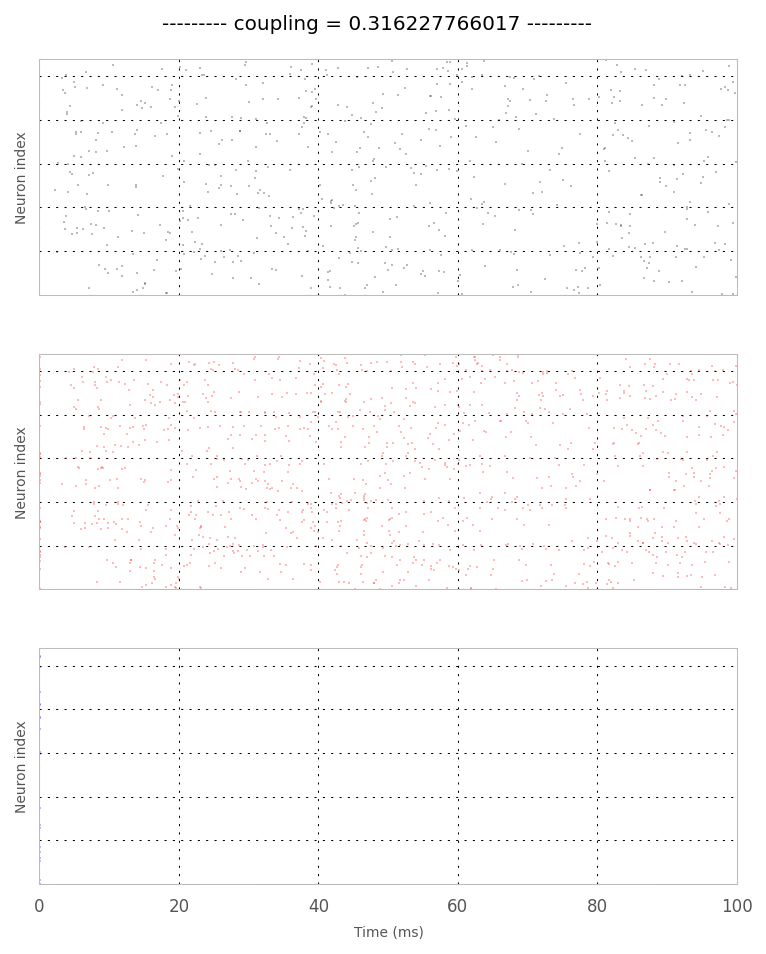

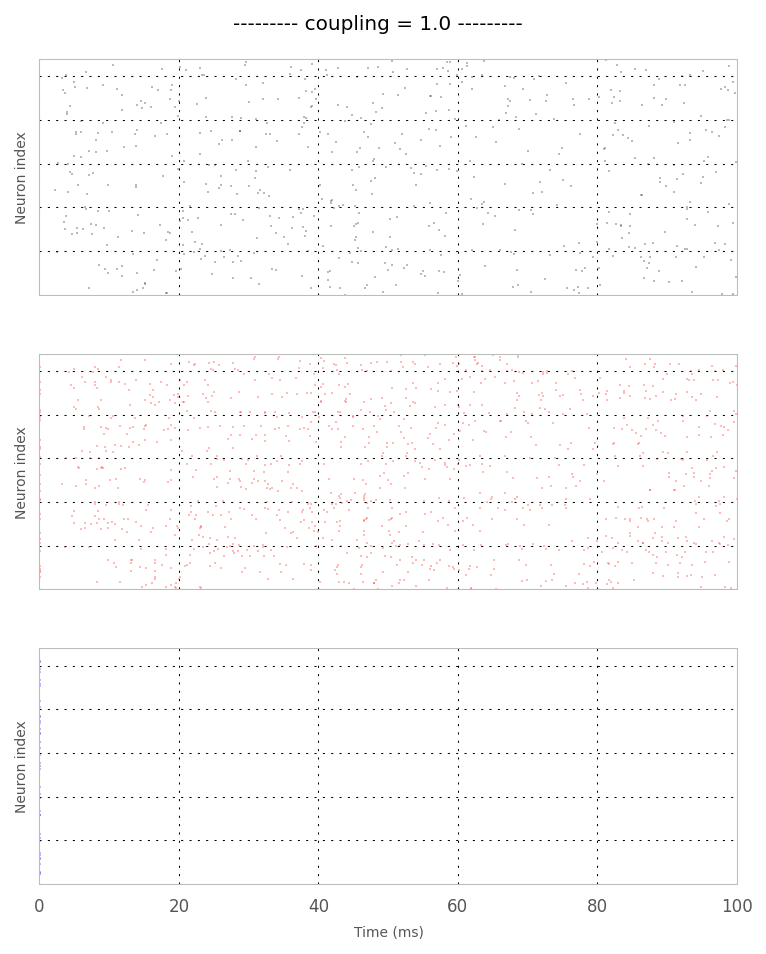

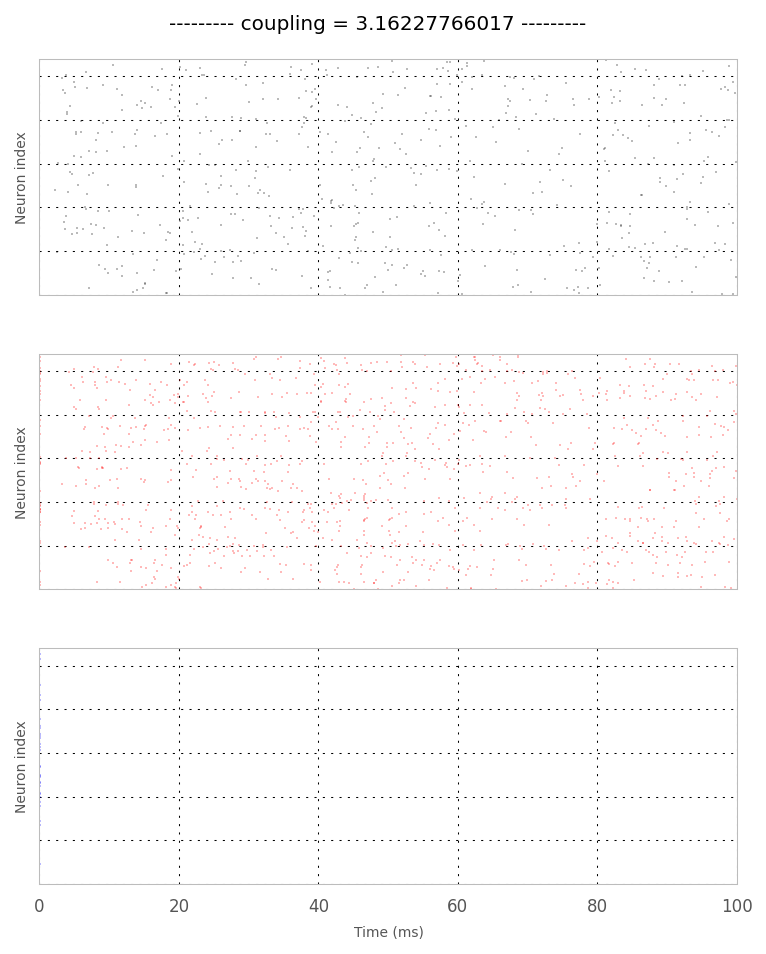

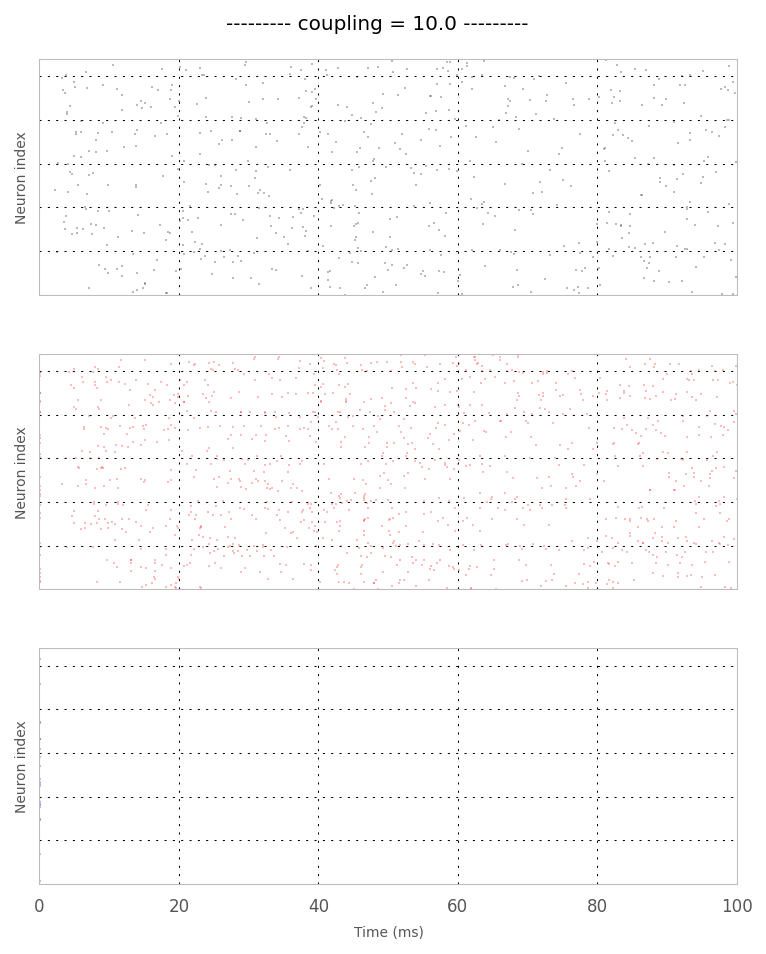

In [4]:
for g in np.logspace(-1, 1, n_sim_each):
    net = RRNN(g=g, time=time)
    net.sim_params['w_exc_inh'] = net.w
    net.sim_params['w_inh_exc'] = net.w * net.g
    net.sim_params['w_exc_exc'] = net.w
    net.sim_params['w_inh_inh'] = net.w * net.g
    df, spikesE, spikesI = net.model()
    net.Raster(df, spikesE, spikesI, input=True, title='coupling = {}'.format(g))
    plt.show()

#### G = Wie, Wei / W

------------ G -------------


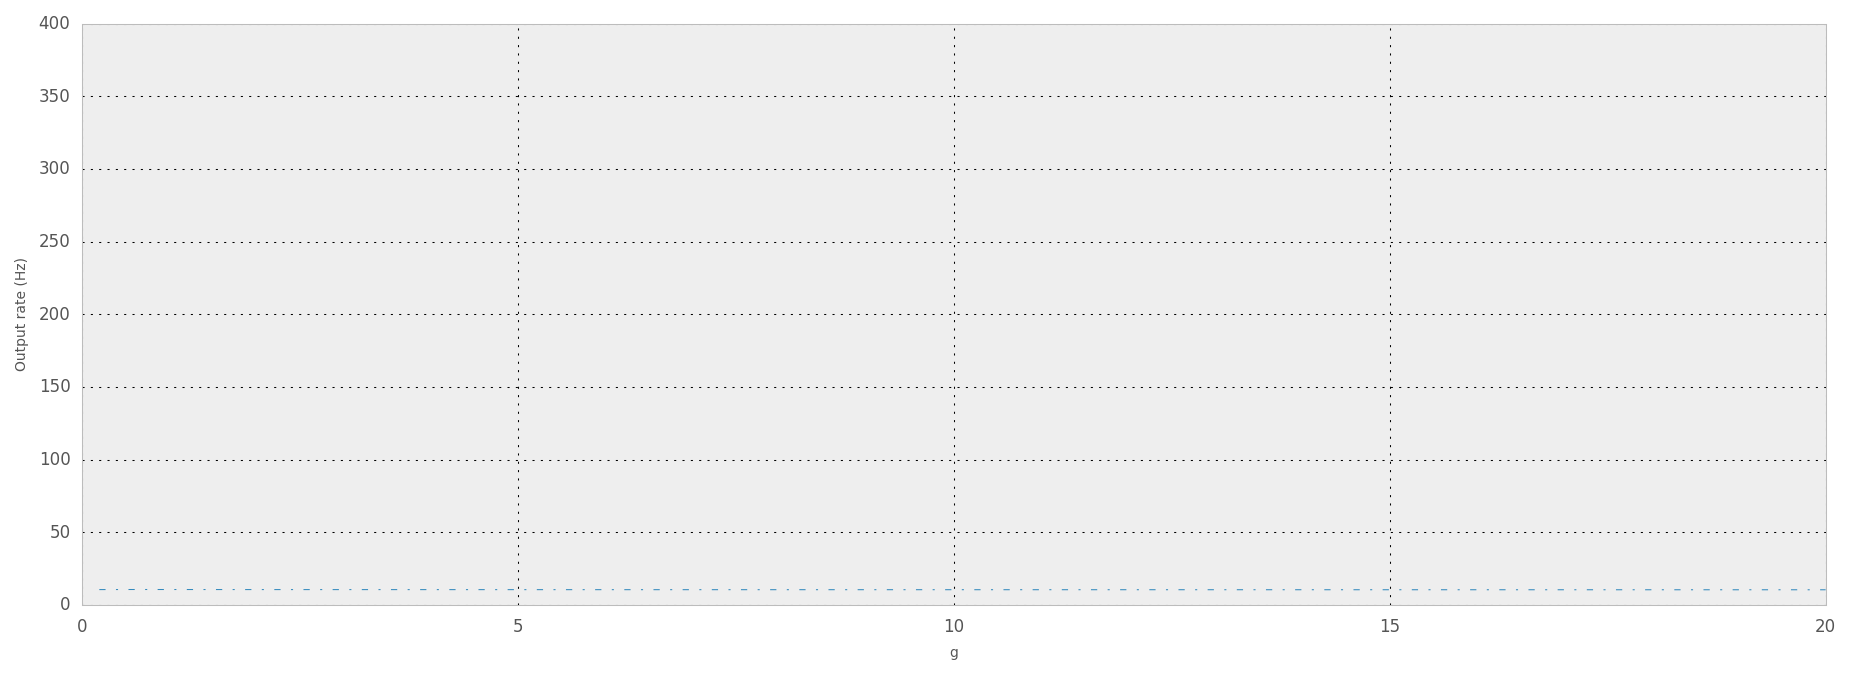

------------ G -------------


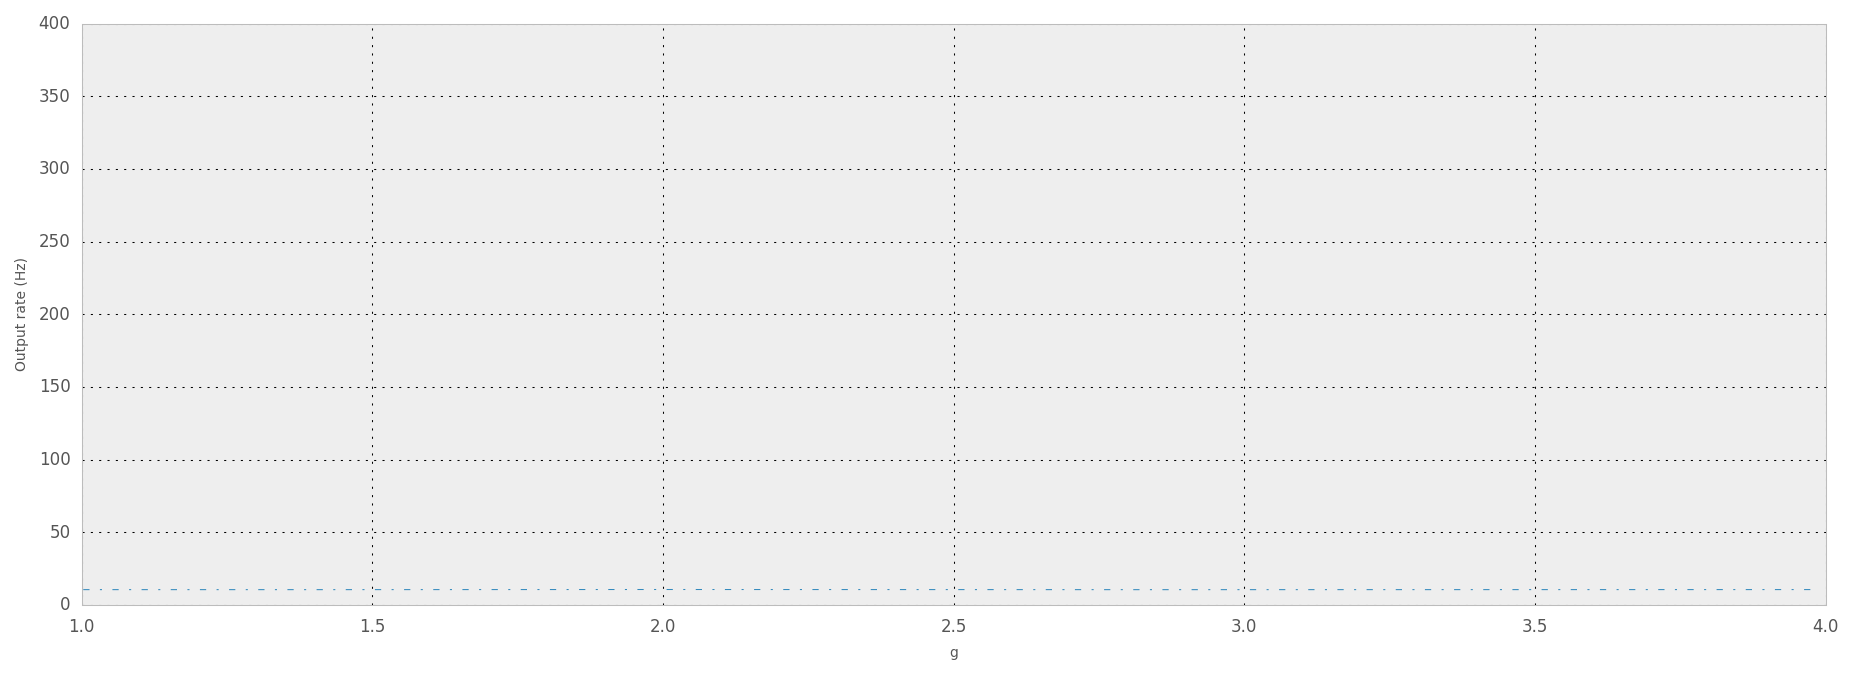

In [5]:
net = RRNN(time=time)
for zoom in [1., .3]:
    net.covariation_Curve('w_inh_exc', 'w_exc_inh',
                      net.w * net.g * np.logspace(-zoom, zoom, n_sim_each),
                      datapath='/tmp/OB-V1_data/RRNN-G1' + tag + str(zoom * 10))

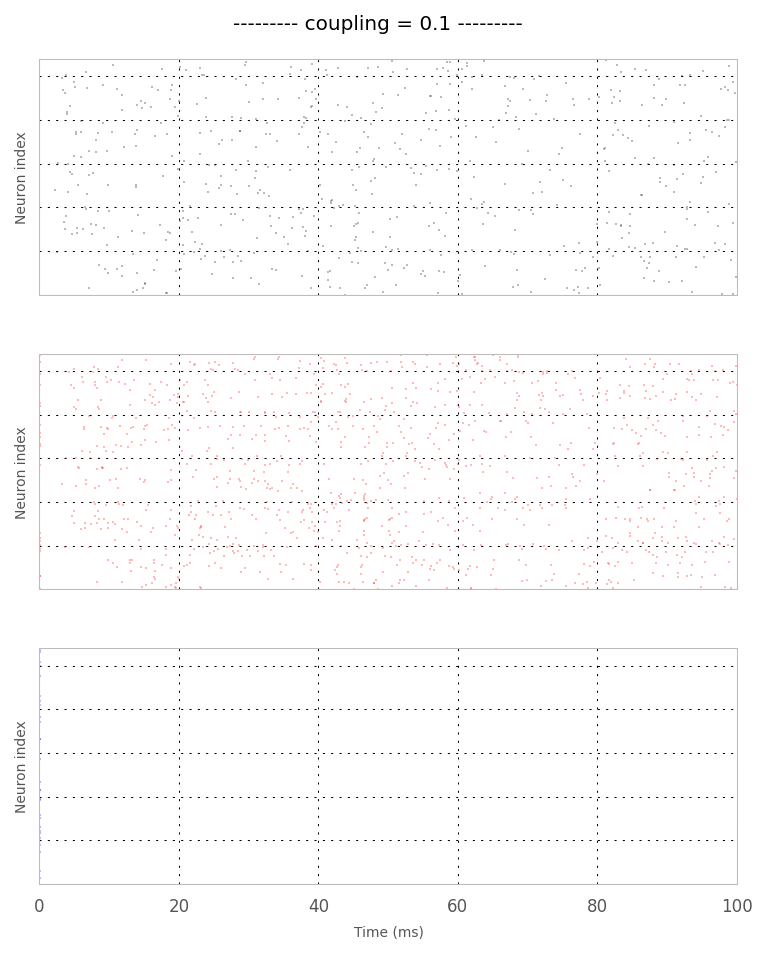

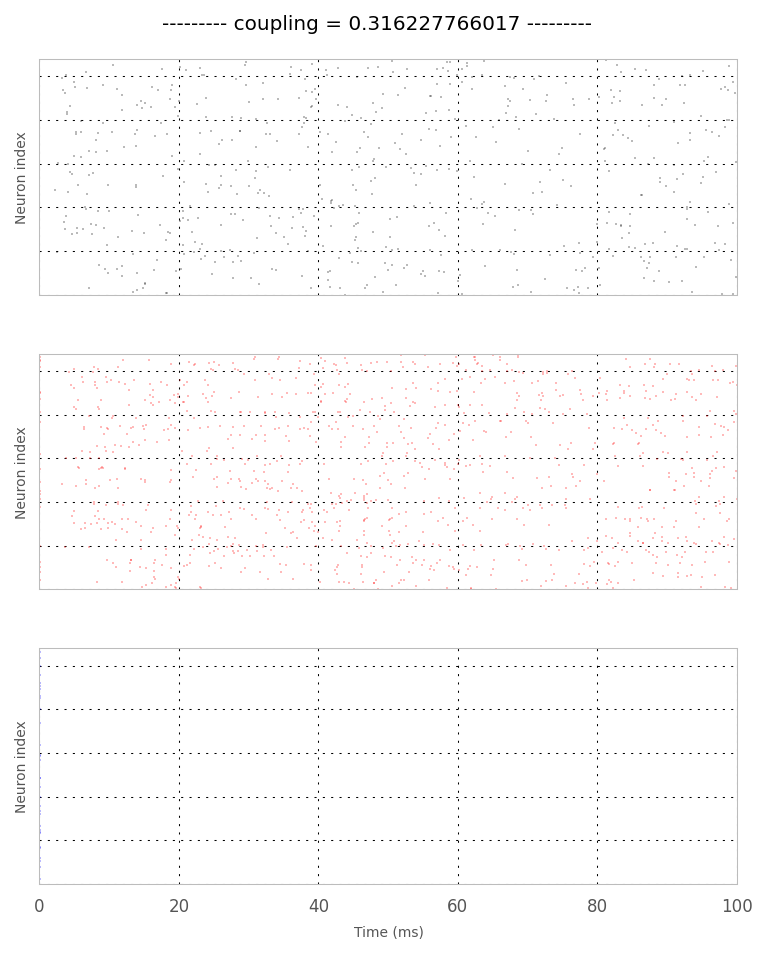

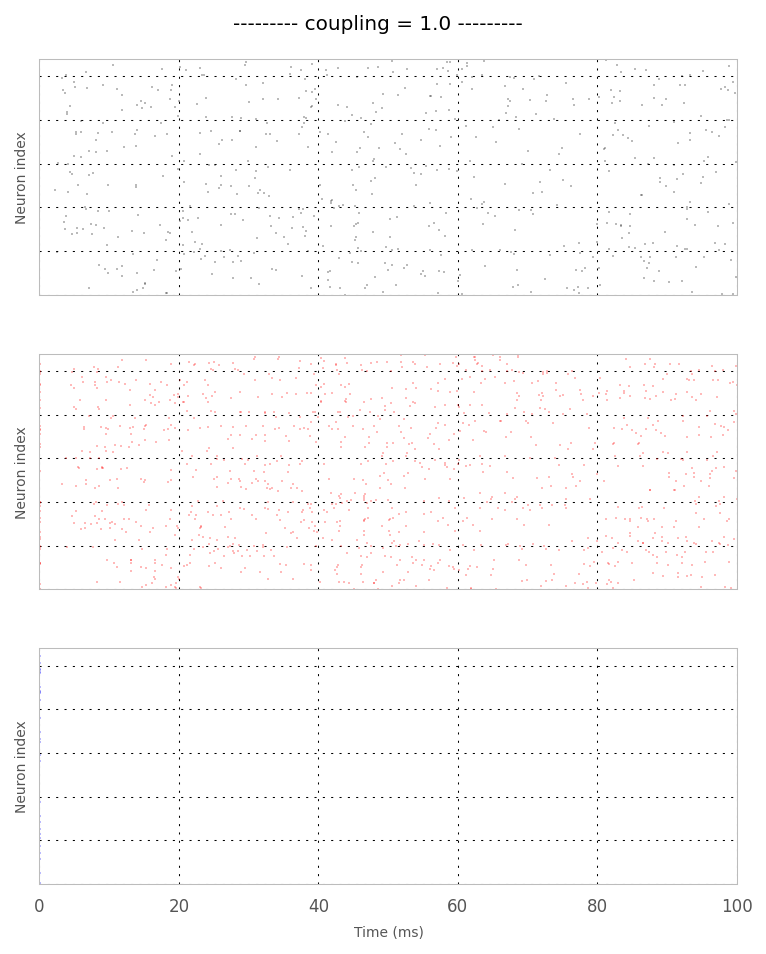

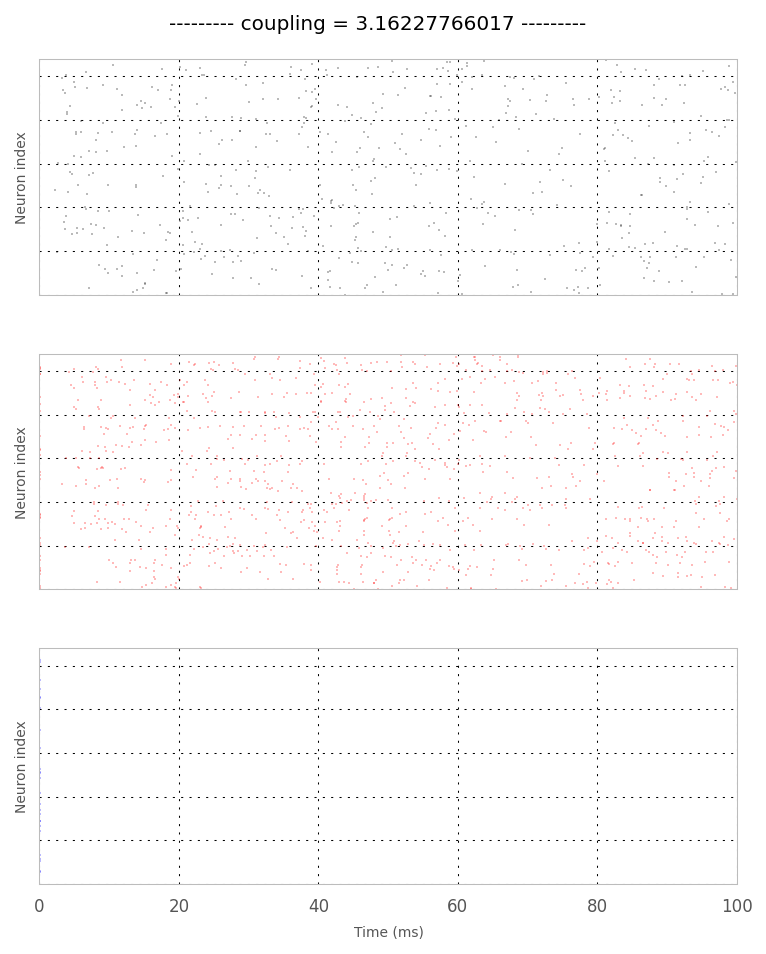

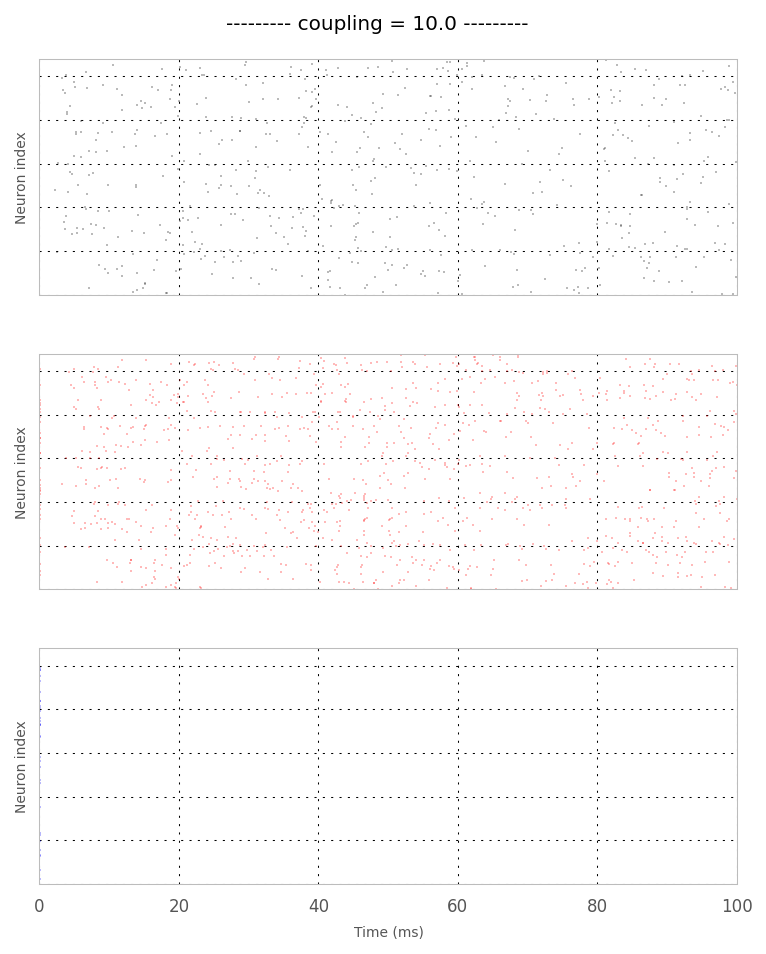

In [6]:
for g in np.logspace(-1, 1, n_sim_each):
    net = RRNN(g=g, time=time)
    net.sim_params['w_exc_inh'] = net.w * net.g
    net.sim_params['w_inh_exc'] = net.w * net.g
    net.sim_params['w_exc_exc'] = net.w
    net.sim_params['w_inh_inh'] = net.w 
    df, spikesE, spikesI = net.model()
    net.Raster(df, spikesE, spikesI, input=True, title='coupling = {}'.format(g))
    plt.show()

#### G = Wei, Wii / W

------------ G -------------


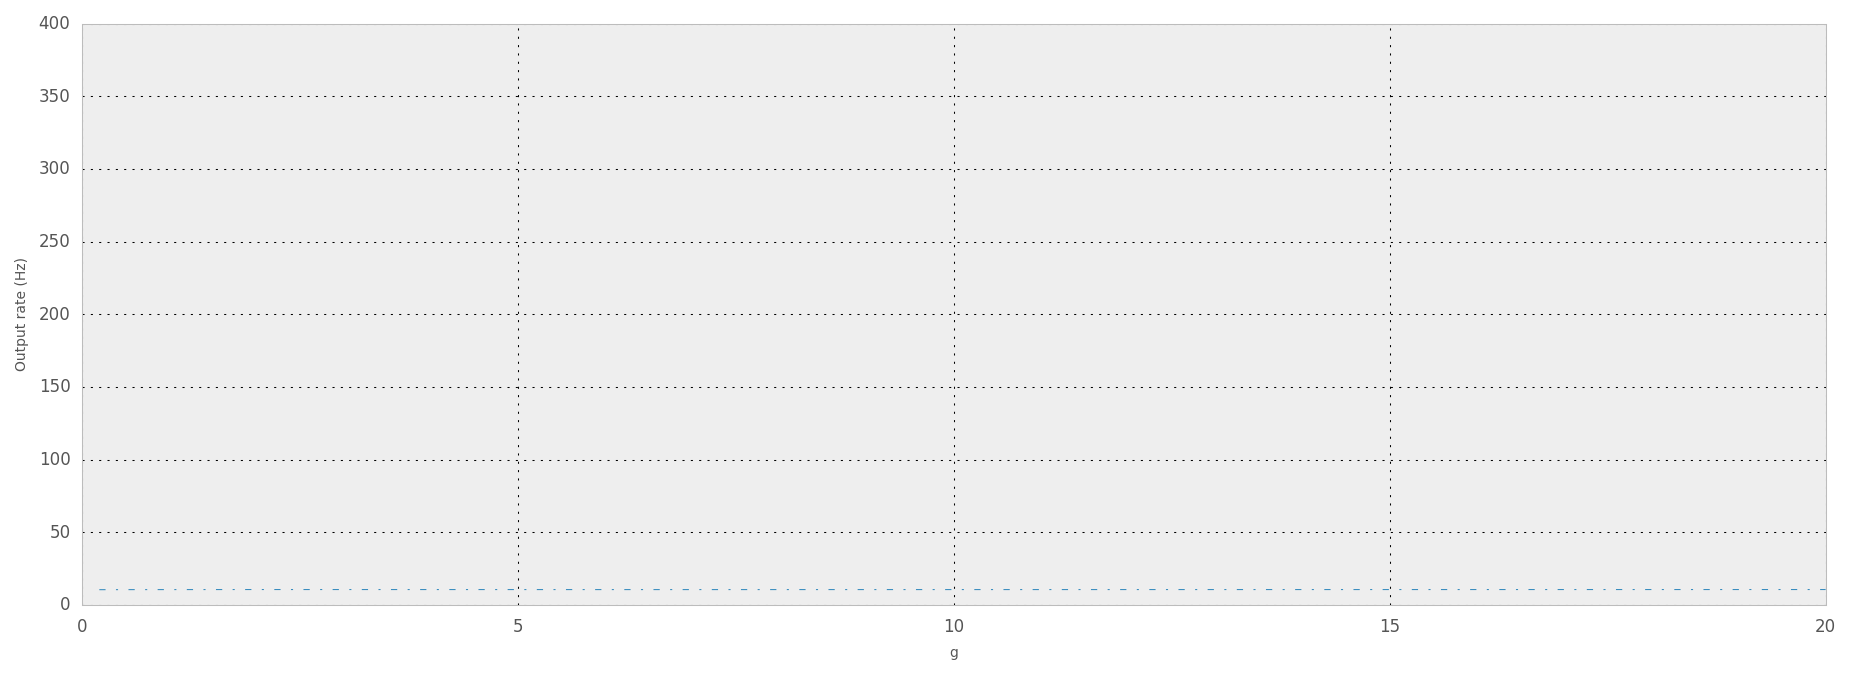

------------ G -------------


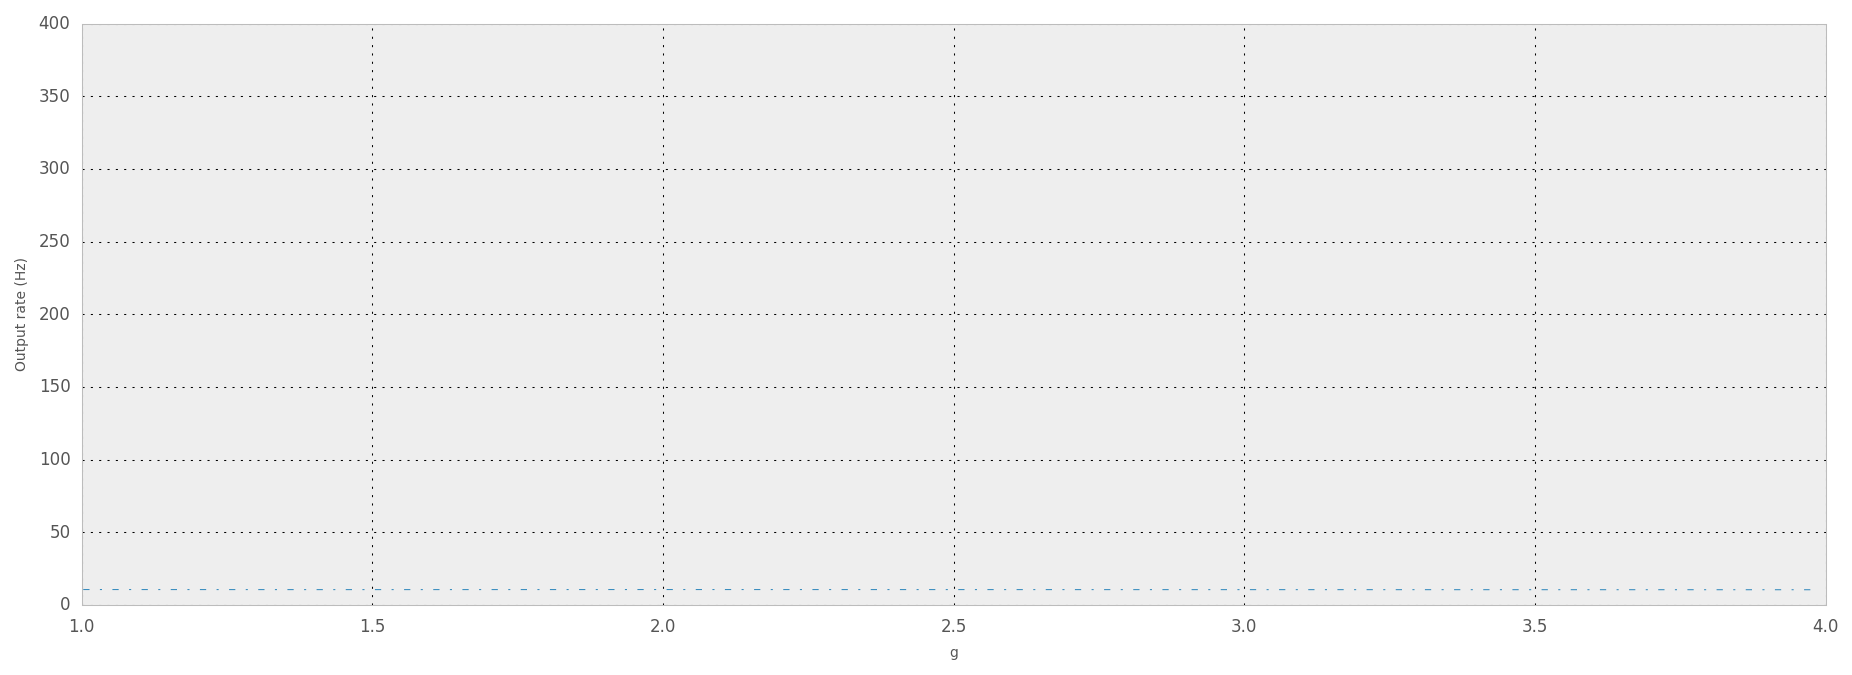

In [7]:
net = RRNN(time=time)
for zoom in [1., .3]:
    net.covariation_Curve('w_exc_inh', 'w_inh_inh',
                      net.w * net.g * np.logspace(-zoom, zoom, n_sim_each),
                      datapath='/tmp/OB-V1_data/RRNN-G2' + tag + str(zoom * 10))

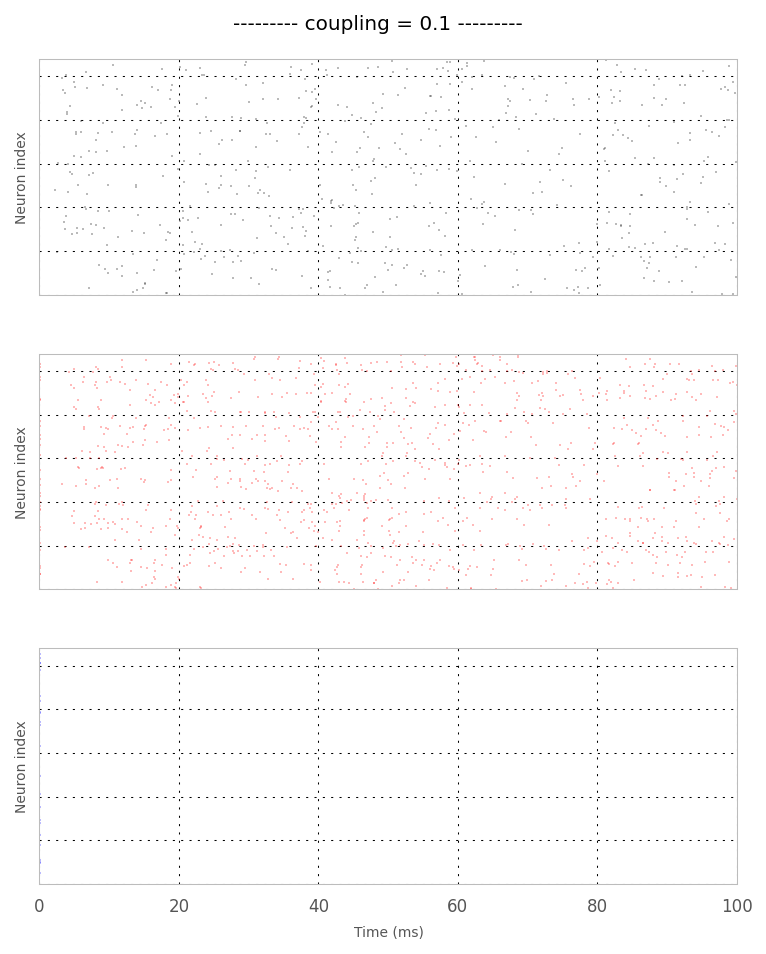

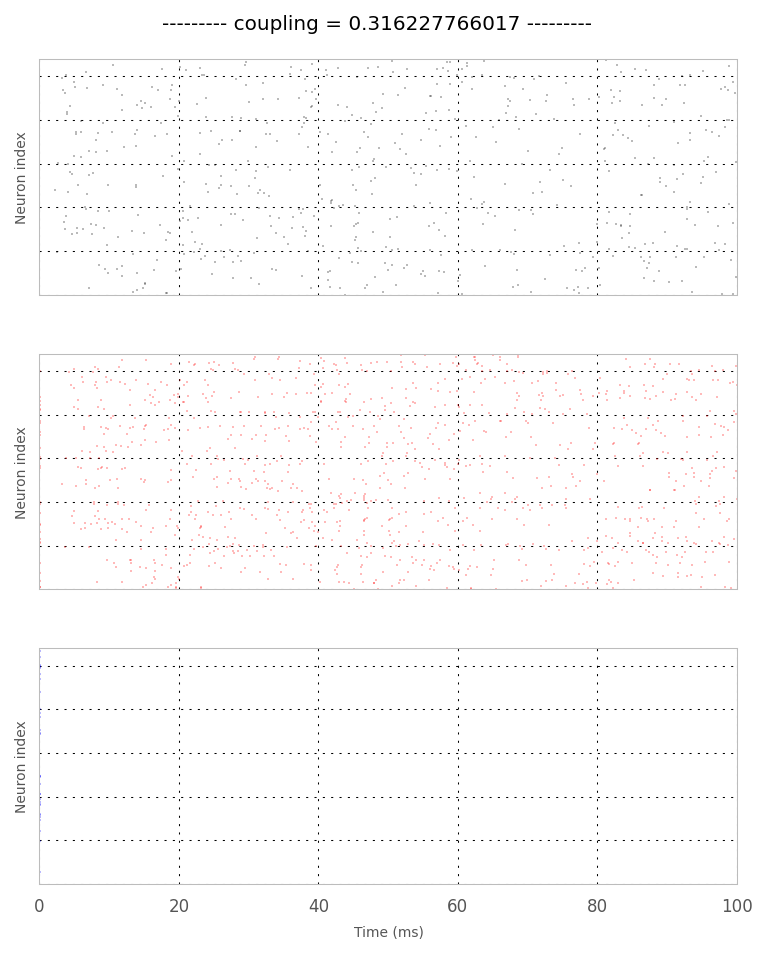

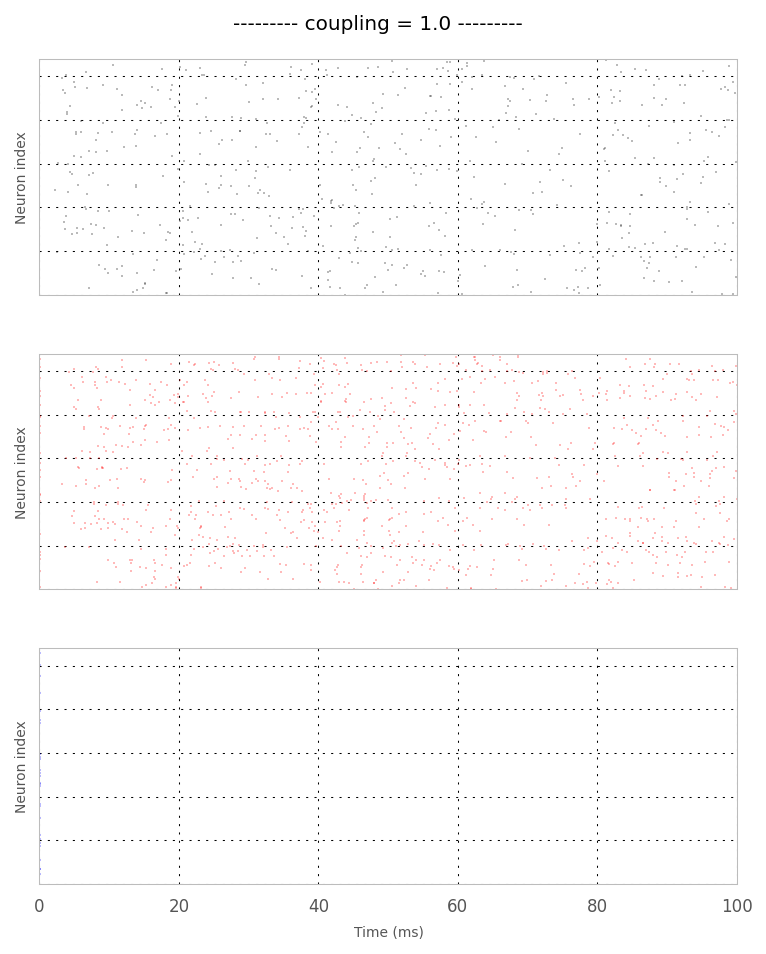

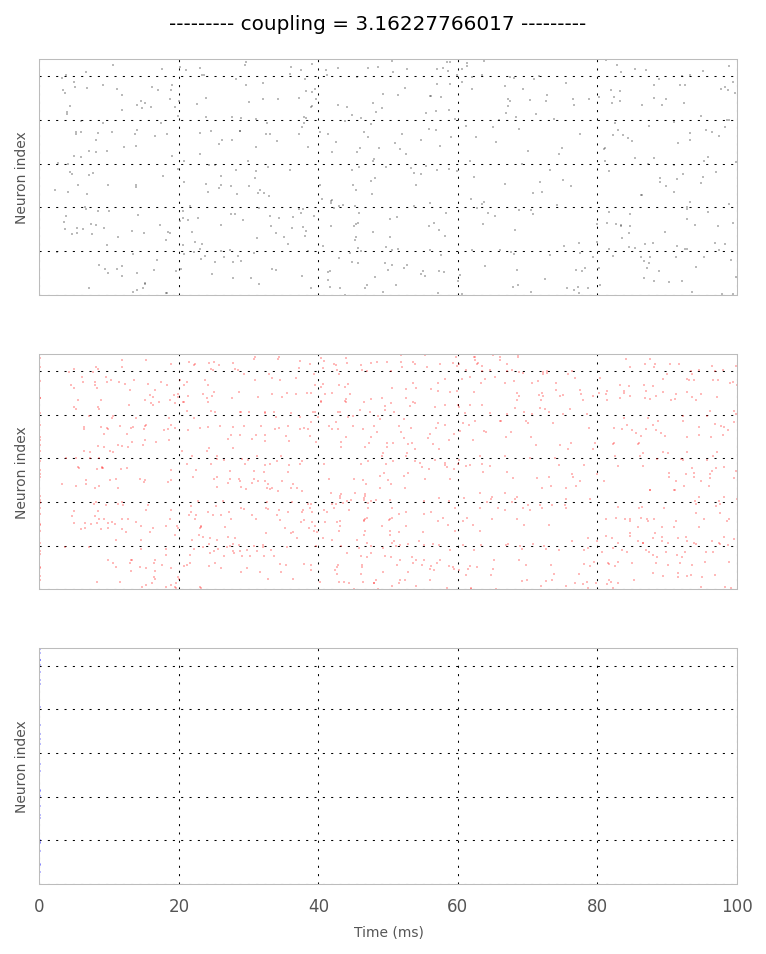

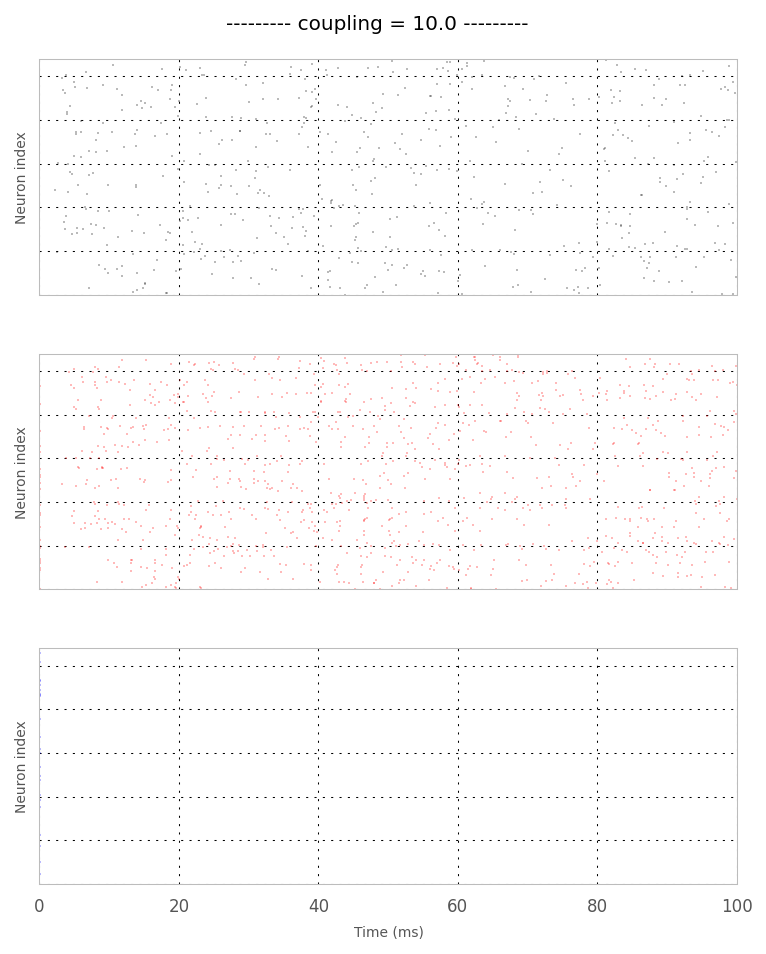

In [8]:
for g in np.logspace(-1, 1, n_sim_each):
    net = RRNN(g=g, time=time)
    net.sim_params['w_exc_inh'] = net.w * net.g
    net.sim_params['w_inh_exc'] = net.w 
    net.sim_params['w_exc_exc'] = net.w
    net.sim_params['w_inh_inh'] = net.w * net.g
    df, spikesE, spikesI = net.model()
    net.Raster(df, spikesE, spikesI, input=True, title='coupling = {}'.format(g))
    plt.show()